# Hybrid: V22
## SD: model V36
## Netlogo: V37
## Python: V13
## Energy Price Model: V2

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pysd
import pyNetLogo
import time
from ema_workbench import save_results

pd.set_option('display.max_columns', 30000)
pd.set_option('display.max_rows', 30000)

In [2]:
priceinputlist_E = ['Initial energy resource prices Oil',
                     'Initial energy resource prices Coal',
                     'Initial energy resource prices Biofuels',
                     'Initial energy resource prices Nuclear E',
                     'Initial energy resource prices other Renewables E',
                     'Initial energy resource prices Gas E']

energyprices_E = ['Energy resource prices Oil',
                   'Energy resource prices Coal',
                   'Energy resource prices Biofuels',
                   'Energy resource prices Nuclear E',
                   'Energy resource prices other Renewables E',
                   'Energy resource prices Gas E']

priceinputlist_NA = ['Initial energy resource prices Oil',
                     'Initial energy resource prices Coal',
                     'Initial energy resource prices Biofuels',
                     'Initial energy resource prices Nuclear NA',
                     'Initial energy resource prices other Renewables NA',
                     'Initial energy resource prices Gas NA']

energyprices_NA = ['Energy resource prices Oil',
                   'Energy resource prices Coal',
                   'Energy resource prices Biofuels',
                   'Energy resource prices Nuclear NA',
                   'Energy resource prices other Renewables NA',
                   'Energy resource prices Gas NA']

priceinputlist_SCA = ['Initial energy resource prices Oil',
                     'Initial energy resource prices Coal',
                     'Initial energy resource prices Biofuels',
                     'Initial energy resource prices Nuclear SCA',
                     'Initial energy resource prices other Renewables SCA',
                     'Initial energy resource prices Gas SCA']

energyprices_SCA = ['Energy resource prices Oil',
                   'Energy resource prices Coal',
                   'Energy resource prices Biofuels',
                   'Energy resource prices Nuclear SCA',
                   'Energy resource prices other Renewables SCA',
                   'Energy resource prices Gas SCA']

priceinputlist_CIS = ['Initial energy resource prices Oil',
                     'Initial energy resource prices Coal',
                     'Initial energy resource prices Biofuels',
                     'Initial energy resource prices Nuclear CIS',
                     'Initial energy resource prices other Renewables CIS',
                     'Initial energy resource prices Gas CIS']

energyprices_CIS = ['Energy resource prices Oil',
                    'Energy resource prices Coal',
                    'Energy resource prices Biofuels',
                    'Energy resource prices Nuclear CIS',
                    'Energy resource prices other Renewables CIS',
                    'Energy resource prices Gas CIS']

priceinputlist_ME = ['Initial energy resource prices Oil',
                     'Initial energy resource prices Coal',
                     'Initial energy resource prices Biofuels',
                     'Initial energy resource prices Nuclear ME',
                     'Initial energy resource prices other Renewables ME',
                     'Initial energy resource prices Gas ME']

energyprices_ME = ['Energy resource prices Oil',
                    'Energy resource prices Coal',
                    'Energy resource prices Biofuels',
                    'Energy resource prices Nuclear ME',
                    'Energy resource prices other Renewables ME',
                    'Energy resource prices Gas ME']

priceinputlist_AF = ['Initial energy resource prices Oil',
                     'Initial energy resource prices Coal',
                     'Initial energy resource prices Biofuels',
                     'Initial energy resource prices Nuclear AF',
                     'Initial energy resource prices other Renewables AF',
                     'Initial energy resource prices Gas AF']

energyprices_AF = ['Energy resource prices Oil',
                    'Energy resource prices Coal',
                    'Energy resource prices Biofuels',
                    'Energy resource prices Nuclear AF',
                    'Energy resource prices other Renewables AF',
                    'Energy resource prices Gas AF']

priceinputlist_AP = ['Initial energy resource prices Oil',
                     'Initial energy resource prices Coal',
                     'Initial energy resource prices Biofuels',
                     'Initial energy resource prices Nuclear AP',
                     'Initial energy resource prices other Renewables AP',
                     'Initial energy resource prices Gas AP']

energyprices_AP = ['Energy resource prices Oil',
                    'Energy resource prices Coal',
                    'Energy resource prices Biofuels',
                    'Energy resource prices Nuclear AP',
                    'Energy resource prices other Renewables AP',
                    'Energy resource prices Gas AP']

priceinputcountry = ['Energy Price Oil',
                     'Energy Price Coal',
                     'Energy Price Biofuels',
                     'Energy Price Nuclear',
                     'Energy Price other Renewables',
                     'Energy Price Gas']

priceinputlist = [priceinputlist_E,
                 priceinputlist_NA,
                 priceinputlist_SCA,
                 priceinputlist_CIS,
                 priceinputlist_ME,
                 priceinputlist_AF,
                 priceinputlist_AP]

energypriceslist = [energyprices_E,
                   energyprices_NA,
                   energyprices_SCA,
                   energyprices_CIS,
                   energyprices_ME,
                   energyprices_AF,
                   energyprices_AP]

listofcolumnsresults = ['Extraction capacity in preparation Gas', 
                        'Extraction capacity installed Gas',
                        'Mothballed capacity Gas',
                        'Undiscovered resources Gas',
                        'Discovered resources reserve base Gas',
                        'Extraction capacity in preparation Oil',
                        'Extraction capacity installed Oil',
                        'Mothballed capacity Oil',
                        'Energy stocks Oil',
                        'Undiscovered resources Oil',
                        'Discovered resources reserve base Oil',
                        'Extraction capacity in preparation Coal',
                        'Extraction capacity installed Coal',
                        'Mothballed capacity Coal',
                        'Energy stocks Coal',
                        'Undiscovered resources Coal',
                        'Discovered resources reserve base Coal',
                        'Extraction capacity in preparation Nuclear',
                        'Extraction capacity installed Nuclear',
                        'Mothballed capacity Nuclear',
                        'Extraction capacity in preparation Biofuels',
                        'Extraction capacity installed Biofuels',
                        'Mothballed capacity Biofuels',
                        'Energy stocks Biofuels',
                        'Extraction capacity in preparation other Renewables',
                        'Extraction capacity installed other Renewables',
                        'Mothballed capacity other Renewables',
                        'GDP',
                        'Energy Intensity GDP',
                        'Future Effect of Shortage on Decoupling',
                        'Effect of Supply Shortage on Decoupling',
                        'TIME',
                        'Region',
                        'Cumulative extracted fuel Gas',
                        'Unit costs Gas',
                        'Cumulative extracted fuel Oil',
                        'Unit costs Oil',
                        'Cumulative extracted fuel Coal',
                        'Unit costs Coal',
                        'Cumulative extracted fuel Nuclear',
                        'Normalised costs relative in relation to learning effects t1 Nuclear',
                        'Unit costs Nuclear',
                        'Cumulative extracted fuel Biofuels',
                        'Normalised costs relative in relation to learning effects t1 Biofuels',
                        'Unit costs Biofuels',
                        'EROEI Biofuels',
                        'Cumulative extracted fuel other Renewables',
                        'Normalised costs relative in relation to learning effects t1 other Renewables',
                        'Unit costs other Renewables',
                        'EROEI other Renewables',
                        'Long term normalized profits Gas',
                        'Long term normalized profits Oil',
                        'Long term normalized profits Coal',
                        'Long term normalized profits Nuclear',
                        'Long term normalized profits Biofuels',
                        'Long term normalized profits other Renewables',
                        'EROI resources Gas',
                        'EROI resources Oil',
                        'EROI resources Coal',
                        'Average normalised learning curve on costs Nuclear',
                        'Average normalised learning curve on costs Biofuels',
                        'Average normalised learning curve on costs other Renewables',
                        'Delay order new capacity Gas',
                        'Delay time new capacity Gas',
                        'Time for deteriation of unused capacity Gas',
                        'Initial relation between reserve base and resource size Gas',
                        'Relative change in costs due to learning Gas',
                        'Average Rb over P gas',
                        'Gas Import',
                        'Gas Export',
                        'Delay order new capacity Oil',
                        'Delay time new capacity Oil',
                        'Time for deteriation of unused capacity Oil',
                        'Initial relation between reserve base and resource size Oil',
                        'Relative change in costs due to learning Oil',
                        'Average Rb over P Oil',
                        'Total export Oil',
                        'Total import Oil',
                        'Average throughput time stocks Oil',
                        'Delay order new capacity Coal',
                        'Delay time new capacity Coal',
                        'Time for deteriation of unused capacity Coal',
                        'Initial relation between reserve base and resource size Coal',
                        'Relative change in costs due to learning Coal',
                        'Average Rb over P Coal',
                        'Total export Coal',
                        'Total import Coal',
                        'Average throughput time stocks Coal',
                        'Delay order new capacity Nuclear',
                        'Delay time new capacity Nuclear',
                        'Time for deteriation of unused capacity Nuclear',
                        'Delay order new capacity Biofuels',
                        'Delay time new capacity Biofuels',
                        'Time for deteriation of unused capacity Biofuels',
                        'Total export Biofuels',
                        'Total import Biofuels',
                        'Average throughput time stocks Biofuels',
                        'Delay order new capacity other Renewables',
                        'Delay time new capacity other Renewables',
                        'Time for deteriation of unused capacity other Renewables',
                        'Factor limiting Economic Growth due to Energy Shortage',
                        'Effect of Energy Shortage on Future Decoupling',
                        'Delay Order Decoupling due to Shortage',
                        'Delay Time Decoupling due to Shortage',
                        'Autonomous Economic Growth Patern Switch',
                        'Autonomous Economic Growth Patern 1',
                        'One Year',
                        'Costs CO2 emissions',
                        'CO2 emissions of natural gas',
                        'CO2 emissions of Oil',
                        'CO2 emissions of coal',
                        'MATH Pi',
                        'Variance power',
                        'Average EROEI energy sources lognormal',
                        'Maximum EROEI',
                        'Minimum EROEI',
                        'Delay order forecasts',
                        'Short forecasting period',
                        'Experience curve parameter extraction',
                        'Initial normalised costs relative in relation to learning effects Nuclear2',
                        'Summed delay time new capacity',
                        'Initial normalised costs relative in relation to learning effects Biofuels2',
                        'Potential EROEI Biofuels',
                        'Initial normalised costs relative in relation to learning effects other Renewables2',
                        'Potential EROEI other Renewables',
                        'Maximum relative mothballing Gas',
                        'Long term profits energy supply period Gas',
                        'Supply elasticity Gas',
                        'Investment fraction normalized profits Gas',
                        'Maximum relative mothballing Oil',
                        'Long term profits energy supply period Oil',
                        'Supply elasticity Oil',
                        'Investment fraction normalized profits Oil',
                        'Maximum relative mothballing Coal',
                        'Long term profits energy supply period Coal',
                        'Supply elasticity Coal',
                        'Investment fraction normalized profits Coal',
                        'Maximum relative mothballing Nuclear',
                        'Long term profits energy supply period Nuclear',
                        'Supply elasticity Nuclear',
                        'Investment fraction normalized profits Nuclear',
                        'Maximum relative mothballing Biofuels',
                        'Long term profits energy supply period Biofuels',
                        'Supply elasticity Biofuels',
                        'Investment fraction normalized profits Biofuels',
                        'Maximum relative mothballing other Renewables',
                        'Long term profits energy supply period other Renewables',
                        'Supply elasticity other Renewables',
                        'Investment fraction normalized profits other Renewables',
                        'Russian Gas',
                        'Storage goal',
                        'Completing new extraction capacity Gas',
                        'Completing new extraction capacity Oil',
                        'Completing new extraction capacity Coal',
                        'Completing new extraction capacity Nuclear',
                        'Completing new extraction capacity Biofuels',
                        'Completing new extraction capacity other Renewables',
                        'Decoupling Effect Materializing']

listofcolumnsinput = ['Initial extraction capacity in preparation Gas', 
                        'Initial extraction capacity Gas',
                        'Initial mothballed capacity Gas',
                        'Initial Undiscovered resources Gas',
                        'Initial reserve base Gas',
                        'Initial extraction capacity in preparation Oil',
                        'Initial extraction capacity Oil',
                        'Initial mothballed capacity Oil',
                        'Initial Energy stocks Oil',
                        'Initial Undiscovered resources Oil',
                        'Initial reserve base Oil',
                        'Initial extraction capacity in preparation Coal',
                        'Initial extraction capacity Coal',
                        'Initial mothballed capacity Coal',
                        'Initial Energy stocks Coal',
                        'Initial Undiscovered resources Coal',
                        'Initial reserve base Coal',
                        'Initial extraction capacity in preparation Nuclear',
                        'Initial extraction capacity Nuclear',
                        'Initial mothballed capacity Nuclear',
                        'Initial extraction capacity in preparation Biofuels',
                        'Initial extraction capacity Biofuels',
                        'Initial mothballed capacity Biofuels',
                        'Initial Energy stocks Biofuels',
                        'Initial extraction capacity in preparation other Renewables',
                        'Initial extraction capacity other Renewables',
                        'Initial mothballed capacity other Renewables',
                        'Initial GDP',
                        'Initial Energy Intensity GDP',
                        'Initial Shortage Effect on Decoupling',
                        'Initial Effect of Supply Shortage on Decoupling',
                        'INITIAL TIME',
                        'Region',
                        'Initial cumulative extraction fuel Gas',
                        'Initial unit costs Gas',
                        'Initial cumulative extraction fuel Oil',
                        'Initial unit costs Oil',
                        'Initial cumulative extraction fuel Coal',
                        'Initial unit costs Coal',
                        'Initial cumulative extraction fuel Nuclear',
                        'Initial normalised costs relative in relation to learning effects Nuclear',
                        'Initial unit costs Nuclear',
                        'Initial cumulative extraction fuel Biofuels',
                        'Initial normalised costs relative in relation to learning effects Biofuels',
                        'Initial unit costs Biofuels',
                        'Initial EROEI Biofuels',
                        'Initial cumulative extraction fuel other Renewables',
                        'Initial normalised costs relative in relation to learning effects other Renewables',
                        'Initial unit costs other Renewables',
                        'Initial EROEI other Renewables',
                        'Initial long term normalized profits Gas',
                        'Initial long term normalized profits Oil',
                        'Initial long term normalized profits Coal',
                        'Initial long term normalized profits Nuclear',
                        'Initial long term normalized profits Biofuels',
                        'Initial long term normalized profits other Renewables',
                        'Initial EROI Gas',
                        'Initial EROI resources Oil',
                        'Initial EROI resources Coal',
                        'Initial average normalised learning curve on costs Nuclear',
                        'Initial average normalised learning curve on costs Biofuels',
                        'Initial average normalised learning curve on costs other Renewables',
                        'Delay order new capacity Gas',
                        'Delay time new capacity Gas',
                        'Time for deteriation of unused capacity Gas',
                        'Initial relation between reserve base and resource size Gas',
                        'Relative change in costs due to learning Gas',
                        'Average Rb over P gas',
                        'Gas Import',
                        'Gas Export',
                        'Delay order new capacity Oil',
                        'Delay time new capacity Oil',
                        'Time for deteriation of unused capacity Oil',
                        'Initial relation between reserve base and resource size Oil',
                        'Relative change in costs due to learning Oil',
                        'Average Rb over P Oil',
                        'Total export Oil',
                        'Total import Oil',
                        'Average throughput time stocks Oil',
                        'Delay order new capacity Coal',
                        'Delay time new capacity Coal',
                        'Time for deteriation of unused capacity Coal',
                        'Initial relation between reserve base and resource size Coal',
                        'Relative change in costs due to learning Coal',
                        'Average Rb over P Coal',
                        'Total export Coal',
                        'Total import Coal',
                        'Average throughput time stocks Coal',
                        'Delay order new capacity Nuclear',
                        'Delay time new capacity Nuclear',
                        'Time for deteriation of unused capacity Nuclear',
                        'Delay order new capacity Biofuels',
                        'Delay time new capacity Biofuels',
                        'Time for deteriation of unused capacity Biofuels',
                        'Total export Biofuels',
                        'Total import Biofuels',
                        'Average throughput time stocks Biofuels',
                        'Delay order new capacity other Renewables',
                        'Delay time new capacity other Renewables',
                        'Time for deteriation of unused capacity other Renewables',
                        'Factor limiting Economic Growth due to Energy Shortage',
                        'Effect of Energy Shortage on Future Decoupling',
                        'Delay Order Decoupling due to Shortage',
                        'Delay Time Decoupling due to Shortage',
                        'Autonomous Economic Growth Patern Switch',
                        'Autonomous Economic Growth Patern 1',
                        'One Year',
                        'Costs CO2 emissions',
                        'CO2 emissions of natural gas',
                        'CO2 emissions of Oil',
                        'CO2 emissions of coal',
                        'MATH Pi',
                        'Variance power',
                        'Average EROEI energy sources lognormal',
                        'Maximum EROEI',
                        'Minimum EROEI',
                        'Delay order forecasts',
                        'Short forecasting period',
                        'Experience curve parameter extraction',
                        'Initial normalised costs relative in relation to learning effects Nuclear2',
                        'Summed delay time new capacity',
                        'Initial normalised costs relative in relation to learning effects Biofuels2',
                        'Potential EROEI Biofuels',
                        'Initial normalised costs relative in relation to learning effects other Renewables2',
                        'Potential EROEI other Renewables',
                        'Maximum relative mothballing Gas',
                        'Long term profits energy supply period Gas',
                        'Supply elasticity Gas',
                        'Investment fraction normalized profits Gas',
                        'Maximum relative mothballing Oil',
                        'Long term profits energy supply period Oil',
                        'Supply elasticity Oil',
                        'Investment fraction normalized profits Oil',
                        'Maximum relative mothballing Coal',
                        'Long term profits energy supply period Coal',
                        'Supply elasticity Coal',
                        'Investment fraction normalized profits Coal',
                        'Maximum relative mothballing Nuclear',
                        'Long term profits energy supply period Nuclear',
                        'Supply elasticity Nuclear',
                        'Investment fraction normalized profits Nuclear',
                        'Maximum relative mothballing Biofuels',
                        'Long term profits energy supply period Biofuels',
                        'Supply elasticity Biofuels',
                        'Investment fraction normalized profits Biofuels',
                        'Maximum relative mothballing other Renewables',
                        'Long term profits energy supply period other Renewables',
                        'Supply elasticity other Renewables',
                        'Investment fraction normalized profits other Renewables',
                        'Russian Gas',
                        'Storage goal',
                        'Initial completing new extraction capacity Gas',
                        'Initial completing new extraction capacity Oil',
                        'Initial completing new extraction capacity Coal',
                        'Initial completing new extraction capacity Nuclear',
                        'Initial completing new extraction capacity Biofuels',
                        'Initial completing new extraction capacity other Renewables',
                        'Initial Decoupling Effect Materializing']

listofcolumnsresultsprices = ['Shadow fictional prices Oil',
                              'Energy resource prices Oil',
                              'Shadow fictional prices Coal',
                              'Energy resource prices Coal',
                              'Shadow fictional prices Biofuels',
                              'Energy resource prices Biofuels',
                              'Shadow fictional prices Nuclear E',
                              'Energy resource prices Nuclear E',
                              'Shadow fictional prices other Renewables E',
                              'Energy resource prices other Renewables E',
                              'Shadow fictional prices Gas E',
                              'Energy resource prices Gas E',
                              'Shadow fictional prices Nuclear NA',
                              'Energy resource prices Nuclear NA',
                              'Shadow fictional prices other Renewables NA',
                              'Energy resource prices other Renewables NA',
                              'Shadow fictional prices Gas NA',
                              'Energy resource prices Gas NA',
                              'Shadow fictional prices Nuclear SCA',
                              'Energy resource prices Nuclear SCA',
                              'Shadow fictional prices other Renewables SCA',
                              'Energy resource prices other Renewables SCA',
                              'Shadow fictional prices Gas SCA',
                              'Energy resource prices Gas SCA',
                              'Shadow fictional prices Nuclear CIS',
                              'Energy resource prices Nuclear CIS',
                              'Shadow fictional prices other Renewables CIS',
                              'Energy resource prices other Renewables CIS',
                              'Shadow fictional prices Gas CIS',
                              'Energy resource prices Gas CIS',
                              'Shadow fictional prices Nuclear ME',
                              'Energy resource prices Nuclear ME',
                              'Shadow fictional prices other Renewables ME',
                              'Energy resource prices other Renewables ME',
                              'Shadow fictional prices Gas ME',
                              'Energy resource prices Gas ME',
                              'Shadow fictional prices Nuclear AF',
                              'Energy resource prices Nuclear AF',
                              'Shadow fictional prices other Renewables AF',
                              'Energy resource prices other Renewables AF',
                              'Shadow fictional prices Gas AF',
                              'Energy resource prices Gas AF',
                              'Shadow fictional prices Nuclear AP',
                              'Energy resource prices Nuclear AP',
                              'Shadow fictional prices other Renewables AP',
                              'Energy resource prices other Renewables AP',
                              'Shadow fictional prices Gas AP',
                              'Energy resource prices Gas AP',
                              'TIME']
    
listofcolumnsinputprices = ['Initial shadow fictional prices Oil',
                            'Initial energy resource prices Oil',
                            'Initial shadow fictional prices Coal',
                            'Initial energy resource prices Coal',
                            'Initial shadow fictional prices Biofuels',
                            'Initial energy resource prices Biofuels',
                            'Initial shadow fictional prices Nuclear E',
                            'Initial energy resource prices Nuclear E',
                            'Initial shadow fictional prices other Renewables E',
                            'Initial energy resource prices other Renewables E',
                            'Initial shadow fictional prices Gas E',
                            'Initial energy resource prices Gas E',
                            'Initial shadow fictional prices Nuclear NA',
                            'Initial energy resource prices Nuclear NA',
                            'Initial shadow fictional prices other Renewables NA',
                            'Initial energy resource prices other Renewables NA',
                            'Initial shadow fictional prices Gas NA',
                            'Initial energy resource prices Gas NA',
                            'Initial shadow fictional prices Nuclear SCA',
                            'Initial energy resource prices Nuclear SCA',
                            'Initial shadow fictional prices other Renewables SCA',
                            'Initial energy resource prices other Renewables SCA',
                            'Initial shadow fictional prices Gas SCA',
                            'Initial energy resource prices Gas SCA',
                            'Initial shadow fictional prices Nuclear CIS',
                            'Initial energy resource prices Nuclear CIS',
                            'Initial shadow fictional prices other Renewables CIS',
                            'Initial energy resource prices other Renewables CIS',
                            'Initial shadow fictional prices Gas CIS',
                            'Initial energy resource prices Gas CIS',
                            'Initial shadow fictional prices Nuclear ME',
                            'Initial energy resource prices Nuclear ME',
                            'Initial shadow fictional prices other Renewables ME',
                            'Initial energy resource prices other Renewables ME',
                            'Initial shadow fictional prices Gas ME',
                            'Initial energy resource prices Gas ME',
                            'Initial shadow fictional prices Nuclear AF',
                            'Initial energy resource prices Nuclear AF',
                            'Initial shadow fictional prices other Renewables AF',
                            'Initial energy resource prices other Renewables AF',
                            'Initial shadow fictional prices Gas AF',
                            'Initial energy resource prices Gas AF',
                            'Initial shadow fictional prices Nuclear AP',
                            'Initial energy resource prices Nuclear AP',
                            'Initial shadow fictional prices other Renewables AP',
                            'Initial energy resource prices other Renewables AP',
                            'Initial shadow fictional prices Gas AP',
                            'Initial energy resource prices Gas AP',
                            'INITIAL TIME']

results_tosave = [
                        'Available Gas',
                        'Extraction capacity installed Gas',
                        'Discovered resources reserve base Gas',
                        'Extraction capacity installed Oil',
                        'Energy stocks Oil',
                        'Discovered resources reserve base Oil',
                        'Extraction capacity installed Coal',
                        'Energy stocks Coal',
                        'Discovered resources reserve base Coal',
                        'Extraction capacity installed Nuclear',
                        'Extraction capacity installed Biofuels',
                        'Energy stocks Biofuels',
                        'Extraction capacity installed other Renewables',
                        'GDP',
                        'Unit costs Gas',
                        'Unit costs Oil',
                        'Unit costs Coal',
                        'Unit costs Nuclear',
                        'Unit costs Biofuels',
                        'Unit costs other Renewables',
                        'Gas Import',
                        'Gas Export',
                        'Total export Oil',
                        'Total import Oil',
                        'Total export Coal',
                        'Total import Coal',
                        'Total export Biofuels',
                        'Total import Biofuels',
                        'CO2 emissions of natural gas',
                        'CO2 emissions of Oil',
                        'CO2 emissions of coal',
                        'Russian Gas',
                        'Energy Demand',
                        'Total Energy Supply',
                        'Energy Demand Gas',
                        'Energy Demand Oil',
                        'Energy Demand Coal',
                        'Energy Demand Nuclear',
                        'Energy Demand Biofuels',
                        'Energy Demand other Renewables',
                        'CO2 emissions']


In [3]:
def resultstodict (resultsnew, ncountries, initialrun, priceinputdict):    
    X = 16
    #Globals

    #Oil
    totaldemand_oil = 0
    totalstocked_oil = 0
    totalcosts_oil = 0
    totalextraction_oil = 0
    for i in range(ncountries):
        totaldemand_oil += resultsnew[i]['New Energy Demand Oil'].values[X]
        totalstocked_oil += resultsnew[i]['Available resources from stocks Oil'].values[X]
        totalcosts_oil += resultsnew[i]['Total costs energy supply Oil'].values[X]
        totalextraction_oil += resultsnew[i]['Extraction capacity installed Oil'].values[X]
    
    try:
        ficprice_oil = totaldemand_oil/totalstocked_oil*totalcosts_oil/totalextraction_oil
    except:
        try:
            ficprice_oil = totalcosts_oil/totalextraction_oil
        except:
            ficprice_oil = totalcosts_oil
                
    #Coal
    totaldemand_coal = 0
    totalstocked_coal = 0
    totalcosts_coal = 0
    totalextraction_coal = 0
    for i in range(ncountries):
        totaldemand_coal += resultsnew[i]['New Energy Demand Coal'].values[X]
        totalstocked_coal += resultsnew[i]['Available resources from stocks Coal'].values[X]
        totalcosts_coal += resultsnew[i]['Total costs energy supply Coal'].values[X]
        totalextraction_coal += resultsnew[i]['Extraction capacity installed Coal'].values[X]
        
    try:    
        ficprice_coal = totaldemand_coal/totalstocked_coal*totalcosts_coal/totalextraction_coal
    except:
        try:
            ficprice_coal = totalcosts_coal/totalextraction_coal
        except:
            ficprice_coal = totalcosts_coal
    
    #Biofuels
    totaldemand_biofuels = 0
    totalstocked_biofuels = 0
    totalcosts_biofuels = 0
    totalextraction_biofuels = 0
    for i in range(ncountries):
        totaldemand_biofuels += resultsnew[i]['New Energy Demand Biofuels'].values[X]
        totalstocked_biofuels += resultsnew[i]['Available resources from stocks Biofuels'].values[X]
        totalcosts_biofuels += resultsnew[i]['Total costs energy supply Biofuels'].values[X]
        totalextraction_biofuels += resultsnew[i]['Extraction capacity installed Biofuels'].values[X]
        
    try:
        ficprice_biofuels = totaldemand_biofuels/totalstocked_biofuels*totalcosts_biofuels/totalextraction_biofuels
    except:
        try: 
            ficprice_biofuels = totalcosts_biofuels/totalextraction_biofuels
        except:
            ficprice_biofuels = totalcosts_biofuels
    
    # Regional
    # E = 1, NA = 2, SCA = 3, CIS = 4, ME = 5, AF = 6, AP = 7
    
    #Nuclear
    costspercentage = 0.3
    totalcosts_nuclear_E = 0
    totalextraction_nuclear_E = 0
    totalcosts_nuclear_NA = 0
    totalextraction_nuclear_NA = 0
    totalcosts_nuclear_SCA = 0
    totalextraction_nuclear_SCA = 0
    totalcosts_nuclear_CIS = 0
    totalextraction_nuclear_CIS = 0
    totalcosts_nuclear_ME = 0
    totalextraction_nuclear_ME = 0
    totalcosts_nuclear_AF = 0
    totalextraction_nuclear_AF = 0
    totalcosts_nuclear_AP = 0
    totalextraction_nuclear_AP = 0
    for i in range(ncountries):
        if resultsnew[i]['Region'].values[X] == 1:
            totalcosts_nuclear_E += resultsnew[i]['Total costs energy supply Nuclear'].values[X]
            totalextraction_nuclear_E += resultsnew[i]['Extraction capacity installed Nuclear'].values[X]
        elif resultsnew[i]['Region'].values[X] == 2:
            totalcosts_nuclear_NA += resultsnew[i]['Total costs energy supply Nuclear'].values[X]
            totalextraction_nuclear_NA += resultsnew[i]['Extraction capacity installed Nuclear'].values[X]
        elif resultsnew[i]['Region'].values[X] == 3:
            totalcosts_nuclear_SCA += resultsnew[i]['Total costs energy supply Nuclear'].values[X]
            totalextraction_nuclear_SCA += resultsnew[i]['Extraction capacity installed Nuclear'].values[X]
        elif resultsnew[i]['Region'].values[X] == 4:
            totalcosts_nuclear_CIS += resultsnew[i]['Total costs energy supply Nuclear'].values[X]
            totalextraction_nuclear_CIS += resultsnew[i]['Extraction capacity installed Nuclear'].values[X]
        elif resultsnew[i]['Region'].values[X] == 5:
            totalcosts_nuclear_ME += resultsnew[i]['Total costs energy supply Nuclear'].values[X]
            totalextraction_nuclear_ME += resultsnew[i]['Extraction capacity installed Nuclear'].values[X]
        elif resultsnew[i]['Region'].values[X] == 6:
            totalcosts_nuclear_AF += resultsnew[i]['Total costs energy supply Nuclear'].values[X]
            totalextraction_nuclear_AF += resultsnew[i]['Extraction capacity installed Nuclear'].values[X]
        elif resultsnew[i]['Region'].values[X] == 7:
            totalcosts_nuclear_AP += resultsnew[i]['Total costs energy supply Nuclear'].values[X]
            totalextraction_nuclear_AP += resultsnew[i]['Extraction capacity installed Nuclear'].values[X]
        
    try:
        ficprice_nuclear_E = totalcosts_nuclear_E/totalextraction_nuclear_E*(1+costspercentage)
    except:
        ficprice_nuclear_E = totalcosts_nuclear_E
    try:
        ficprice_nuclear_NA = totalcosts_nuclear_NA/totalextraction_nuclear_NA*(1+costspercentage)
    except:
        ficprice_nuclear_NA = totalcosts_nuclear_NA
    try:
        ficprice_nuclear_SCA = totalcosts_nuclear_SCA/totalextraction_nuclear_SCA*(1+costspercentage)
    except:
        ficprice_nuclear_SCA = totalcosts_nuclear_SCA
    try:
        ficprice_nuclear_CIS = totalcosts_nuclear_CIS/totalextraction_nuclear_CIS*(1+costspercentage)
    except:
        ficprice_nuclear_CIS = totalcosts_nuclear_CIS
    try:
        ficprice_nuclear_ME = totalcosts_nuclear_ME/totalextraction_nuclear_ME*(1+costspercentage)
    except:
        ficprice_nuclear_ME = totalcosts_nuclear_ME
    try:
        ficprice_nuclear_AF = totalcosts_nuclear_AF/totalextraction_nuclear_AF*(1+costspercentage)
    except:
        ficprice_nuclear_AF = totalcosts_nuclear_AF
    try:
        ficprice_nuclear_AP = totalcosts_nuclear_AP/totalextraction_nuclear_AP*(1+costspercentage)
    except:
        ficprice_nuclear_AP = totalcosts_nuclear_AP
    
    #Other Renewables
    totalcosts_oR_E = 0
    totalextraction_oR_E = 0
    totalcosts_oR_NA = 0
    totalextraction_oR_NA = 0
    totalcosts_oR_SCA = 0
    totalextraction_oR_SCA = 0
    totalcosts_oR_CIS = 0
    totalextraction_oR_CIS = 0
    totalcosts_oR_ME = 0
    totalextraction_oR_ME = 0
    totalcosts_oR_AF = 0
    totalextraction_oR_AF = 0
    totalcosts_oR_AP = 0
    totalextraction_oR_AP = 0
    for i in range(ncountries):
        if resultsnew[i]['Region'].values[X] == 1:
            totalcosts_oR_E += resultsnew[i]['Total costs energy supply other Renewables'].values[X]
            totalextraction_oR_E += resultsnew[i]['Extraction capacity installed other Renewables'].values[X]
        elif resultsnew[i]['Region'].values[X] == 2:
            totalcosts_oR_NA += resultsnew[i]['Total costs energy supply other Renewables'].values[X]
            totalextraction_oR_NA += resultsnew[i]['Extraction capacity installed other Renewables'].values[X]
        elif resultsnew[i]['Region'].values[X] == 3:
            totalcosts_oR_SCA += resultsnew[i]['Total costs energy supply other Renewables'].values[X]
            totalextraction_oR_SCA += resultsnew[i]['Extraction capacity installed other Renewables'].values[X]
        elif resultsnew[i]['Region'].values[X] == 4:
            totalcosts_oR_CIS += resultsnew[i]['Total costs energy supply other Renewables'].values[X]
            totalextraction_oR_CIS += resultsnew[i]['Extraction capacity installed other Renewables'].values[X]
        elif resultsnew[i]['Region'].values[X] == 5:
            totalcosts_oR_ME += resultsnew[i]['Total costs energy supply other Renewables'].values[X]
            totalextraction_oR_ME += resultsnew[i]['Extraction capacity installed other Renewables'].values[X]
        elif resultsnew[i]['Region'].values[X] == 6:
            totalcosts_oR_AF += resultsnew[i]['Total costs energy supply other Renewables'].values[X]
            totalextraction_oR_AF += resultsnew[i]['Extraction capacity installed other Renewables'].values[X]
        elif resultsnew[i]['Region'].values[X] == 7:
            totalcosts_oR_AP += resultsnew[i]['Total costs energy supply other Renewables'].values[X]
            totalextraction_oR_AP += resultsnew[i]['Extraction capacity installed other Renewables'].values[X]
        
    try:
        ficprice_oR_E = totalcosts_oR_E/totalextraction_oR_E*(1+costspercentage)
    except:
        ficprice_oR_E = totalcosts_oR_E   
    try:
        ficprice_oR_NA = totalcosts_oR_NA/totalextraction_oR_NA*(1+costspercentage)
    except:
        ficprice_oR_NA = totalcosts_oR_NA
    try:
        ficprice_oR_SCA = totalcosts_oR_SCA/totalextraction_oR_SCA*(1+costspercentage)
    except:
        ficprice_oR_SCA = totalcosts_oR_SCA
    try:
        ficprice_oR_CIS = totalcosts_oR_CIS/totalextraction_oR_CIS*(1+costspercentage)
    except:
        ficprice_oR_CIS = totalcosts_oR_CIS
    try:
        ficprice_oR_ME = totalcosts_oR_ME/totalextraction_oR_ME*(1+costspercentage)
    except:
        ficprice_oR_ME = totalcosts_oR_ME 
    try:
        ficprice_oR_AF = totalcosts_oR_AF/totalextraction_oR_AF*(1+costspercentage)
    except:
        ficprice_oR_AF = totalcosts_oR_AF
    try:
        ficprice_oR_AP = totalcosts_oR_AP/totalextraction_oR_AP*(1+costspercentage)
    except:
        ficprice_oR_AP = totalcosts_oR_AP
    
    #Gas
    amplifier = 0.5
    totalcosts_gas_E = 0
    totalextraction_gas_E = 0
    totaldemand_gas_E = 0
    totalcosts_gas_NA = 0
    totalextraction_gas_NA = 0
    totaldemand_gas_NA = 0
    totalcosts_gas_SCA = 0
    totalextraction_gas_SCA = 0
    totaldemand_gas_SCA = 0
    totalcosts_gas_SCA = 0
    totalextraction_gas_SCA = 0
    totaldemand_gas_SCA = 0
    totalcosts_gas_CIS = 0
    totalextraction_gas_CIS = 0
    totaldemand_gas_CIS = 0
    totalcosts_gas_ME = 0
    totalextraction_gas_ME = 0
    totaldemand_gas_ME = 0
    totalcosts_gas_AF = 0
    totalextraction_gas_AF = 0
    totaldemand_gas_AF = 0
    totalcosts_gas_AP = 0
    totalextraction_gas_AP = 0
    totaldemand_gas_AP = 0
    for i in range(ncountries):
        if resultsnew[i]['Region'].values[X] == 1:
            totalcosts_gas_E += resultsnew[i]['Total costs energy supply Gas'].values[X]
            totalextraction_gas_E += resultsnew[i]['Extraction capacity installed Gas'].values[X]
            totaldemand_gas_E += resultsnew[i]['New Energy Demand Gas'].values[X]
        elif resultsnew[i]['Region'].values[X] == 2:
            totalcosts_gas_NA += resultsnew[i]['Total costs energy supply Gas'].values[X]
            totalextraction_gas_NA += resultsnew[i]['Extraction capacity installed Gas'].values[X]
            totaldemand_gas_NA += resultsnew[i]['New Energy Demand Gas'].values[X]
        elif resultsnew[i]['Region'].values[X] == 3:
            totalcosts_gas_SCA += resultsnew[i]['Total costs energy supply Gas'].values[X]
            totalextraction_gas_SCA += resultsnew[i]['Extraction capacity installed Gas'].values[X]
            totaldemand_gas_SCA += resultsnew[i]['New Energy Demand Gas'].values[X]
        elif resultsnew[i]['Region'].values[X] == 4:
            totalcosts_gas_CIS += resultsnew[i]['Total costs energy supply Gas'].values[X]
            totalextraction_gas_CIS += resultsnew[i]['Extraction capacity installed Gas'].values[X]
            totaldemand_gas_CIS += resultsnew[i]['New Energy Demand Gas'].values[X]
        elif resultsnew[i]['Region'].values[X] == 5:
            totalcosts_gas_ME += resultsnew[i]['Total costs energy supply Gas'].values[X]
            totalextraction_gas_ME += resultsnew[i]['Extraction capacity installed Gas'].values[X]
            totaldemand_gas_ME += resultsnew[i]['New Energy Demand Gas'].values[X]
        elif resultsnew[i]['Region'].values[X] == 6:
            totalcosts_gas_AF += resultsnew[i]['Total costs energy supply Gas'].values[X]
            totalextraction_gas_AF += resultsnew[i]['Extraction capacity installed Gas'].values[X]
            totaldemand_gas_AF += resultsnew[i]['New Energy Demand Gas'].values[X]
        elif resultsnew[i]['Region'].values[X] == 7:
            totalcosts_gas_AP += resultsnew[i]['Total costs energy supply Gas'].values[X]
            totalextraction_gas_AP += resultsnew[i]['Extraction capacity installed Gas'].values[X]
            totaldemand_gas_AP += resultsnew[i]['New Energy Demand Gas'].values[X]
            
    if totaldemand_gas_E > 0:
        try:
            ficprice_gas_E = totalcosts_gas_E/totalextraction_gas_E*(totaldemand_gas_E/totalextraction_gas_E)^amplifier
        except:
            try:
                ficprice_gas_E = totalcosts_gas_E/totalextraction_gas_E
            except:
                ficprice_gas_E = totalcosts_gas_E
    else:
        try:
            ficprice_gas_E = totalcosts_gas_E/totalextraction_gas_E
        except:
            ficprice_gas_E = totalcosts_gas_E
    if totaldemand_gas_NA > 0:
        try:
            ficprice_gas_NA = totalcosts_gas_NA/totalextraction_gas_NA*(totaldemand_gas_NA/totalextraction_gas_NA)^amplifier
        except:
            try: 
                ficprice_gas_NA = totalcosts_gas_NA/totalextraction_gas_NA
            except:
                ficprice_gas_NA = totalcosts_gas_NA
    else:
        try:
            ficprice_gas_NA = totalcosts_gas_NA/totalextraction_gas_NA
        except:
            ficprice_gas_NA = totalcosts_gas_NA
    if totaldemand_gas_SCA > 0:
        try:
            ficprice_gas_SCA = totalcosts_gas_SCA/totalextraction_gas_SCA*(totaldemand_gas_SCA/totalextraction_gas_SCA)^amplifier
        except:
            try:
                ficprice_gas_SCA = totalcosts_gas_SCA/totalextraction_gas_SCA
            except:
                ficprice_gas_SCA = totalcosts_gas_SCA
    else:
        try:
            ficprice_gas_SCA = totalcosts_gas_SCA/totalextraction_gas_SCA
        except:
            ficprice_gas_SCA = totalcosts_gas_SCA
    if totaldemand_gas_CIS > 0:
        try:
            ficprice_gas_CIS = totalcosts_gas_CIS/totalextraction_gas_CIS*(totaldemand_gas_CIS/totalextraction_gas_CIS)^amplifier
        except:
            try: 
                ficprice_gas_CIS = totalcosts_gas_CIS/totalextraction_gas_CIS
            except:
                ficprice_gas_CIS = totalcosts_gas_CIS
    else:
        try:
            ficprice_gas_CIS = totalcosts_gas_CIS/totalextraction_gas_CIS
        except:
            ficprice_gas_CIS = totalcosts_gas_CIS
    if totaldemand_gas_ME > 0:
        try:
            ficprice_gas_ME = totalcosts_gas_ME/totalextraction_gas_ME*(totaldemand_gas_ME/totalextraction_gas_ME)^amplifier
        except:
            try:
                ficprice_gas_ME = totalcosts_gas_ME/totalextraction_gas_ME
            except:
                ficprice_gas_ME = totalcosts_gas_ME
    else:
        try:
            ficprice_gas_ME = totalcosts_gas_ME/totalextraction_gas_ME
        except:
            ficprice_gas_ME = totalcosts_gas_ME
    if totaldemand_gas_AF > 0:
        try:
            ficprice_gas_AF = totalcosts_gas_AF/totalextraction_gas_AF*(totaldemand_gas_AF/totalextraction_gas_AF)^amplifier
        except:
            try:
                ficprice_gas_AF = totalcosts_gas_AF/totalextraction_gas_AF
            except:
                ficprice_gas_AF = totalcosts_gas_AF
    else:
        try:
            ficprice_gas_AF = totalcosts_gas_AF/totalextraction_gas_AF
        except:
            ficprice_gas_AF = totalcosts_gas_AF
    if totaldemand_gas_AP > 0:
        try:
            ficprice_gas_AP = totalcosts_gas_AP/totalextraction_gas_AP*(totaldemand_gas_AP/totalextraction_gas_AP)^amplifier
        except:
            try:
                ficprice_gas_AP = totalcosts_gas_AP/totalextraction_gas_AP
            except:
                ficprice_gas_AP = totalcosts_gas_AP
    else:
        try:
            ficprice_gas_AP = totalcosts_gas_AP/totalextraction_gas_AP
        except:
            ficprice_gas_AP = totalcosts_gas_AP
            
    if initialrun == 1:
        pricedict = {'Fictional prices Oil': ficprice_oil,
                 'Fictional prices Coal': ficprice_coal,
                 'Fictional prices Biofuels': ficprice_biofuels,
                 'Fictional prices Nuclear E': ficprice_nuclear_E,
                 'Fictional prices other Renewables E': ficprice_oR_E,
                 'Fictional prices Gas E': ficprice_gas_E,
                 'Fictional prices Nuclear NA': ficprice_nuclear_NA,
                 'Fictional prices other Renewables NA': ficprice_oR_NA,
                 'Fictional prices Gas NA': ficprice_gas_NA,
                 'Fictional prices Nuclear SCA': ficprice_nuclear_SCA,
                 'Fictional prices other Renewables SCA': ficprice_oR_SCA,
                 'Fictional prices Gas SCA': ficprice_gas_SCA,
                 'Fictional prices Nuclear CIS': ficprice_nuclear_CIS,
                 'Fictional prices other Renewables CIS': ficprice_oR_CIS,
                 'Fictional prices Gas CIS': ficprice_gas_CIS,
                 'Fictional prices Nuclear ME': ficprice_nuclear_ME,
                 'Fictional prices other Renewables ME': ficprice_oR_ME,
                 'Fictional prices Gas ME': ficprice_gas_ME,
                 'Fictional prices Nuclear AF': ficprice_nuclear_AF,
                 'Fictional prices other Renewables AF': ficprice_oR_AF,
                 'Fictional prices Gas AF': ficprice_gas_AF,
                 'Fictional prices Nuclear AP': ficprice_nuclear_AP,
                 'Fictional prices other Renewables AP': ficprice_oR_AP,
                 'Fictional prices Gas AP': ficprice_gas_AP,
                 'Initial shadow fictional prices Oil': ficprice_oil,
                 'Initial shadow fictional prices Coal': ficprice_coal,
                 'Initial shadow fictional prices Biofuels': ficprice_biofuels,
                 'Initial shadow fictional prices Nuclear E': ficprice_nuclear_E,
                 'Initial shadow fictional prices other Renewables E': ficprice_oR_E,
                 'Initial shadow fictional prices Gas E': ficprice_gas_E,
                 'Initial shadow fictional prices Nuclear NA': ficprice_nuclear_NA,
                 'Initial shadow fictional prices other Renewables NA': ficprice_oR_NA,
                 'Initial shadow fictional prices Gas NA': ficprice_gas_NA,
                 'Initial shadow fictional prices Nuclear SCA': ficprice_nuclear_SCA,
                 'Initial shadow fictional prices other Renewables SCA': ficprice_oR_SCA,
                 'Initial shadow fictional prices Gas SCA': ficprice_gas_SCA,
                 'Initial shadow fictional prices Nuclear CIS': ficprice_nuclear_CIS,
                 'Initial shadow fictional prices other Renewables CIS': ficprice_oR_CIS,
                 'Initial shadow fictional prices Gas CIS': ficprice_gas_CIS,
                 'Initial shadow fictional prices Nuclear ME': ficprice_nuclear_ME,
                 'Initial shadow fictional prices other Renewables ME': ficprice_oR_ME,
                 'Initial shadow fictional prices Gas ME': ficprice_gas_ME,
                 'Initial shadow fictional prices Nuclear AF': ficprice_nuclear_AF,
                 'Initial shadow fictional prices other Renewables AF': ficprice_oR_AF,
                 'Initial shadow fictional prices Gas AF': ficprice_gas_AF,
                 'Initial shadow fictional prices Nuclear AP': ficprice_nuclear_AP,
                 'Initial shadow fictional prices other Renewables AP': ficprice_oR_AP,
                 'Initial shadow fictional prices Gas AP': ficprice_gas_AP}
        pricedict.update(priceinputdict)
    else:
        pricedict = {'Fictional prices Oil': ficprice_oil,
                 'Fictional prices Coal': ficprice_coal,
                 'Fictional prices Biofuels': ficprice_biofuels,
                 'Fictional prices Nuclear E': ficprice_nuclear_E,
                 'Fictional prices other Renewables E': ficprice_oR_E,
                 'Fictional prices Gas E': ficprice_gas_E,
                 'Fictional prices Nuclear NA': ficprice_nuclear_NA,
                 'Fictional prices other Renewables NA': ficprice_oR_NA,
                 'Fictional prices Gas NA': ficprice_gas_NA,
                 'Fictional prices Nuclear SCA': ficprice_nuclear_SCA,
                 'Fictional prices other Renewables SCA': ficprice_oR_SCA,
                 'Fictional prices Gas SCA': ficprice_gas_SCA,
                 'Fictional prices Nuclear CIS': ficprice_nuclear_CIS,
                 'Fictional prices other Renewables CIS': ficprice_oR_CIS,
                 'Fictional prices Gas CIS': ficprice_gas_CIS,
                 'Fictional prices Nuclear ME': ficprice_nuclear_ME,
                 'Fictional prices other Renewables ME': ficprice_oR_ME,
                 'Fictional prices Gas ME': ficprice_gas_ME,
                 'Fictional prices Nuclear AF': ficprice_nuclear_AF,
                 'Fictional prices other Renewables AF': ficprice_oR_AF,
                 'Fictional prices Gas AF': ficprice_gas_AF,
                 'Fictional prices Nuclear AP': ficprice_nuclear_AP,
                 'Fictional prices other Renewables AP': ficprice_oR_AP,
                 'Fictional prices Gas AP': ficprice_gas_AP}
    
    return pricedict

In [4]:
def runnetlogo(agent_gas, netlogo, ncountries, netlogoglobals):
    
    netlogo.write_NetLogo_attriblist(agent_gas[['who', 
                                                'GS', 
                                                'Coalsurplus', 
                                                'Oilsurplus', 
                                                'Biofuelsurplus']],
                                                 'country')
    netlogo.write_NetLogo_attriblist(netlogoglobals[['who', 
                                                     'inputpowerfactor',
                                                     'inputtransferprice',
                                                     'inputLNGprice',
                                                    'inputprice1',
                                                    'inputprice2',
                                                    'inputprice3',
                                                    'inputprice4',
                                                    'inputprice5',
                                                    'inputprice6',
                                                    'inputprice7']], 'country')
    
    netlogo.command('repeat 1 [go]')
    
    gasimportlist = netlogo.report('gasimportlist')
    gasimportlist = np.split(gasimportlist, ncountries)
    gasexportlist = netlogo.report('gasexportlist')
    gasexportlist = np.split(gasexportlist, ncountries)
    
    Gasimport = []
    Gasexport = []
    for i in range(ncountries):
        Gasimport.append(gasimportlist[i][0])
        Gasexport.append(gasexportlist[i][0])
        
    coalimportlist = netlogo.report('coalimportlist')
    coalimportlist = np.split(coalimportlist, ncountries)
    coalexportlist = netlogo.report('coalexportlist')
    coalexportlist = np.split(coalexportlist, ncountries)
    
    Coalimport = []
    Coalexport = []
    for i in range(ncountries):
        Coalimport.append(coalimportlist[i][0])
        Coalexport.append(coalexportlist[i][0])
    
    oilimportlist = netlogo.report('oilimportlist')
    oilimportlist = np.split(oilimportlist, ncountries)
    oilexportlist = netlogo.report('oilexportlist')
    oilexportlist = np.split(oilexportlist, ncountries)
    
    Oilimport = []
    Oilexport = []
    for i in range(ncountries):
        Oilimport.append(oilimportlist[i][0])
        Oilexport.append(oilexportlist[i][0])
    
    biofuelimportlist = netlogo.report('biofuelimportlist')
    biofuelimportlist = np.split(biofuelimportlist, ncountries)
    biofuelexportlist = netlogo.report('biofuelexportlist')
    biofuelexportlist = np.split(biofuelexportlist, ncountries)
    
    Biofuelimport = []
    Biofuelexport = []
    for i in range(ncountries):
        Biofuelimport.append(biofuelimportlist[i][0])
        Biofuelexport.append(biofuelexportlist[i][0])
        
    russiangaslist = netlogo.report('russiangaslist')
    russiangaslist = np.split(russiangaslist, ncountries)
        
    Russiangasimport = []
    for i in range(ncountries):
        Russiangasimport.append(russiangaslist[i][0])
        
    return Gasimport, Gasexport, Coalimport, Coalexport, Oilimport, Oilexport, Biofuelimport, Biofuelexport, Russiangasimport

In [5]:
def hybridloop(years, pricechecktime, dealtime, debug):
    print("Loading SD country model...")
    sd_model = pysd.read_vensim("modelV36.mdl")
    print("Loading SD price model...")
    price_model = pysd.read_vensim("EnergyPriceModelV2.mdl")
    netlogo = pyNetLogo.NetLogoLink(gui=False)
    print("Loading Netlogo model...")
    netlogo.load_model(r'modelv37.nlogo')
    print("Setting up Netlogo...")
    netlogo.command('setup')
    
    print("Preparing input data...")
    modelinput = pd.read_csv("testlanden8.csv")
    inputdict = modelinput.to_dict('index')
    ncountries = len(modelinput)
    
    priceinput = pd.read_csv("startpricesonly3.csv")
    priceinputdict = priceinput.to_dict('index')[0]
    
    netlogoglobals = pd.read_csv("netlogoglobals2.csv")  
    
    initialtime = 2015
    
    pricedictlist = []
    for regionalinput in priceinputlist:
        pricedictlist.append(priceinput[regionalinput].to_dict('index')[0])
    
    for k_price, k_countryinput in zip(priceinputlist_E, priceinputcountry):
        priceinputE = pricedictlist[0]
        priceinputE[k_countryinput] = priceinputE.pop(k_price) 
    
    for k_price, k_countryinput in zip(priceinputlist_NA, priceinputcountry):
        priceinputNA = pricedictlist[1]
        priceinputNA[k_countryinput] = priceinputNA.pop(k_price)
    
    for k_price, k_countryinput in zip(priceinputlist_SCA, priceinputcountry):
        priceinputSCA = pricedictlist[2]
        priceinputSCA[k_countryinput] = priceinputSCA.pop(k_price) 
        
    for k_price, k_countryinput in zip(priceinputlist_CIS, priceinputcountry):
        priceinputCIS = pricedictlist[3]
        priceinputCIS[k_countryinput] = priceinputCIS.pop(k_price) 
        
    for k_price, k_countryinput in zip(priceinputlist_ME, priceinputcountry):
        priceinputME = pricedictlist[4]
        priceinputME[k_countryinput] = priceinputME.pop(k_price) 
    
    for k_price, k_countryinput in zip(priceinputlist_AF, priceinputcountry):
        priceinputAF = pricedictlist[5]
        priceinputAF[k_countryinput] = priceinputAF.pop(k_price) 
        
    for k_price, k_countryinput in zip(priceinputlist_AP, priceinputcountry):
        priceinputAP = pricedictlist[6]
        priceinputAP[k_countryinput] = priceinputAP.pop(k_price)
        
    for value in inputdict.values():
        value['FINAL TIME'] = 2016
        if value['Region'] == 1:
            value.update(priceinputE)
        elif value['Region'] == 2:
            value.update(priceinputNA)
        elif value['Region'] == 3:
            value.update(priceinputSCA)
        elif value['Region'] == 4:
            value.update(priceinputCIS)
        elif value['Region'] == 5:
            value.update(priceinputME)
        elif value['Region'] == 6:
            value.update(priceinputAF)
        elif value['Region'] == 7:
            value.update(priceinputAP)    

    print("Running dummyresults...")
    dummyresults = []
    for value in inputdict.values():
        dummyresults.append(sd_model.run(params=value))
        
    initialrun = 1
    pricemodelinputdict = resultstodict(dummyresults, ncountries, initialrun, priceinputdict)
    initialrun = 0

    GS = []
    CS = []
    OS = []
    BO = []
            
    for country in dummyresults:
        GS.append(country['Gas to trade'].values[16])
        CS.append(country['Coal to trade'].values[16])
        OS.append(country['Oil to trade'].values[16])
        BO.append(country['Biofuels to trade'].values[16])    
    
    gasdata = {'who': list(range (41)),
               'GS': GS,
               'Coalsurplus': CS,
               'Oilsurplus': OS,
               'Biofuelsurplus': BO}
    
    agent_gas = pd.DataFrame (gasdata, columns=['who', 'GS', 'Coalsurplus', 'Oilsurplus', 'Biofuelsurplus'])
    
    netlogoglobals['inputTime'] = initialtime
    netlogoglobals['inputprice1'] = priceinput['Initial energy resource prices Gas E'].values[0]
    netlogoglobals['inputprice2'] = priceinput['Initial energy resource prices Gas NA'].values[0]
    netlogoglobals['inputprice3'] = priceinput['Initial energy resource prices Gas SCA'].values[0]
    netlogoglobals['inputprice4'] = priceinput['Initial energy resource prices Gas CIS'].values[0]
    netlogoglobals['inputprice5'] = priceinput['Initial energy resource prices Gas ME'].values[0]
    netlogoglobals['inputprice6'] = priceinput['Initial energy resource prices Gas AF'].values[0]
    netlogoglobals['inputprice7'] = priceinput['Initial energy resource prices Gas AP'].values[0]

    Gasimport, Gasexport, Coalimport, Coalexport, Oilimport, Oilexport, Biofuelimport, Biofuelexport, Russiangasimport = runnetlogo(agent_gas, netlogo, ncountries,netlogoglobals)
    
        
    print("Running models...")
    pricemodelinputdict.update({'FINAL TIME': initialtime+pricechecktime}) 
    priceresults = price_model.run(params=pricemodelinputdict)
        
    countryresults = []
    for value, gi, ge, ci, ce, oi, oe, bi, be, rg in zip(inputdict.values(), Gasimport, Gasexport, Coalimport, Coalexport, Oilimport, Oilexport, Biofuelimport, Biofuelexport, Russiangasimport):
        value['INITIAL TIME'] = initialtime
        value['FINAL TIME'] = initialtime+pricechecktime
        value['Gas Import'] = gi
        value['Gas Export'] = ge
        value['Total import Coal'] = ci
        value['Total export Coal'] = ce
        value['Total import Oil'] = oi
        value['Total export Oil'] = oe
        value['Total import Biofuels'] = bi
        value['Total export Biofuels'] = be
        value['Russian Gas'] = rg
        countryresults.append(sd_model.run(params=value))
        
    combresults = [countryresults]
    combprices = [priceresults]
    
    for n in range(pricechecktime, years, pricechecktime):
        print("Year: ", n)
        finalvalues = []
        for singleresult in countryresults:
            finalvalues.append(singleresult.ix[[16], listofcolumnsresults])
    
        dictlist = []
        for valueset in finalvalues:
            newdict = valueset.to_dict('records')[0]
            for k_results, k_input in zip(listofcolumnsresults, listofcolumnsinput):
                newdict[k_input] = newdict.pop(k_results)
            dictlist.append(newdict)
            
        dictdict = {}
        for i in range(ncountries):
            dictdict.update({i:{}})
        dictdict = {key:dictlist[i] for (key, value), i in zip(dictdict.items(), range(ncountries))}
            
        updatedprices = priceresults.iloc[16]
        pricedictlist = []
        for regionalinput in energypriceslist:
            pricedictlist.append(updatedprices[regionalinput].to_dict())
    
        for k_price, k_countryinput in zip(energyprices_E, priceinputcountry):
            priceinputE = pricedictlist[0]
            priceinputE[k_countryinput] = priceinputE.pop(k_price) 
    
        for k_price, k_countryinput in zip(energyprices_NA, priceinputcountry):
            priceinputNA = pricedictlist[1]
            priceinputNA[k_countryinput] = priceinputNA.pop(k_price)
    
        for k_price, k_countryinput in zip(energyprices_SCA, priceinputcountry):
            priceinputSCA = pricedictlist[2]
            priceinputSCA[k_countryinput] = priceinputSCA.pop(k_price) 
    
        for k_price, k_countryinput in zip(energyprices_CIS, priceinputcountry):
            priceinputCIS = pricedictlist[3]
            priceinputCIS[k_countryinput] = priceinputCIS.pop(k_price) 
            
        for k_price, k_countryinput in zip(energyprices_ME, priceinputcountry):
            priceinputME = pricedictlist[4]
            priceinputME[k_countryinput] = priceinputME.pop(k_price)
            
        for k_price, k_countryinput in zip(energyprices_AF, priceinputcountry):
            priceinputAF = pricedictlist[5]
            priceinputAF[k_countryinput] = priceinputAF.pop(k_price)       
        
        for k_price, k_countryinput in zip(energyprices_AP, priceinputcountry):
            priceinputAP = pricedictlist[6]
            priceinputAP[k_countryinput] = priceinputAP.pop(k_price) 
    
        for value in dictdict.values():
            if value['Region'] == 1:
                value.update(priceinputE)
            elif value['Region'] == 2:
                value.update(priceinputNA)
            elif value['Region'] == 3:
                value.update(priceinputSCA)
            elif value['Region'] == 4:
                value.update(priceinputCIS)
            elif value['Region'] == 5:
                value.update(priceinputME)
            elif value['Region'] == 6:
                value.update(priceinputAF)
            elif value['Region'] == 7:
                value.update(priceinputAP)
    
        pricemodelinputdict = resultstodict(countryresults, ncountries, initialrun, priceinputdict)
    
        finalpricevalues = priceresults.ix[[16], listofcolumnsresultsprices]
    
        stockdictprices = finalpricevalues.to_dict('index')[16]
        for k_results, k_input in zip(listofcolumnsresultsprices, listofcolumnsinputprices):
            stockdictprices[k_input] = stockdictprices.pop(k_results)
        pricemodelinputdict.update(stockdictprices)
        pricemodelinputdict.update({'FINAL TIME': initialtime+pricechecktime+n})
        
        priceresults = price_model.run(params=pricemodelinputdict)
        
        countryresults = []

        for value, gi, ge, ci, ce, oi, oe, bi, be, rg in zip(dictdict.values(), Gasimport, Gasexport, Coalimport, Coalexport, Oilimport, Oilexport, Biofuelimport, Biofuelexport, Russiangasimport):
            value['FINAL TIME'] = value['INITIAL TIME'] + pricechecktime
            value['Gas Import'] = gi
            value['Gas Export'] = ge
            value['Total import Coal'] = ci
            value['Total export Coal'] = ce
            value['Total import Oil'] = oi
            value['Total export Oil'] = oe
            value['Total import Biofuels'] = bi
            value['Total export Biofuels'] = be
            value['Russian Gas'] = rg
            countryresults.append(sd_model.run(params=value))
        
        combresults.append(countryresults)
        combprices.append(priceresults)
        
        if n%dealtime == 0:
            print("Running Netlogo...")
            GS = []
            CS = []
            OS = []
            BO = []
            
            for country in countryresults:
                GS.append(country['Gas to trade'].values[16])
                CS.append(country['Coal to trade'].values[16])
                OS.append(country['Oil to trade'].values[16])
                BO.append(country['Biofuels to trade'].values[16])   
                
            gasdata = {'who': list(range (41)),
                       'GS': GS,
                       'Coalsurplus': CS,
                       'Oilsurplus': OS,
                       'Biofuelsurplus': BO}
            
            agent_gas = pd.DataFrame (gasdata, columns=['who', 'GS', 'Coalsurplus', 'Oilsurplus', 'Biofuelsurplus'])
            
            netlogoglobals['inputTime'] = countryresults[0]['FINAL TIME'].values[16]
            netlogoglobals['inputprice1'] = finalpricevalues['Energy resource prices Gas E'].values
            netlogoglobals['inputprice2'] = finalpricevalues['Energy resource prices Gas NA'].values
            netlogoglobals['inputprice3'] = finalpricevalues['Energy resource prices Gas SCA'].values
            netlogoglobals['inputprice4'] = finalpricevalues['Energy resource prices Gas CIS'].values
            netlogoglobals['inputprice5'] = finalpricevalues['Energy resource prices Gas ME'].values
            netlogoglobals['inputprice6'] = finalpricevalues['Energy resource prices Gas AF'].values
            netlogoglobals['inputprice7'] = finalpricevalues['Energy resource prices Gas AP'].values
            
            Gasimport, Gasexport, Coalimport, Coalexport, Oilimport, Oilexport, Biofuelimport, Biofuelexport, Russiangasimport = runnetlogo(agent_gas, netlogo, ncountries,netlogoglobals)
                    
    prices = pd.concat(combprices)
    results = [pd.concat([entry[n] for entry in combresults]) for n in range(ncountries)]        
    
    resultssave = []
    for country in results:
        resultssave.append(country[results_tosave].iloc[::4, :])
    
    prices = prices.iloc[::4, :]
    
    return resultssave, prices

In [6]:
starttime = time.time()
results, prices = hybridloop(40, 1, 5, 0)
endtime = time.time()
elapsedtime = endtime - starttime
elapsedtime

Loading SD country model...
Loading SD price model...
Loading Netlogo model...
Setting up Netlogo...
Preparing input data...
Running dummyresults...
Running models...
Year:  1


C:\Users\ludov\Anaconda364\lib\site-packages\ipykernel_launcher.py:139: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\ludov\Anaconda364\lib\site-packages\ipykernel_launcher.py:204: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Year:  2
Year:  3
Year:  4
Year:  5
Running Netlogo...
Year:  6
Year:  7
Year:  8
Year:  9
Year:  10
Running Netlogo...
Year:  11
Year:  12
Year:  13
Year:  14
Year:  15
Running Netlogo...
Year:  16
Year:  17
Year:  18
Year:  19
Year:  20
Running Netlogo...
Year:  21
Year:  22
Year:  23
Year:  24
Year:  25
Running Netlogo...
Year:  26
Year:  27
Year:  28
Year:  29
Year:  30
Running Netlogo...
Year:  31
Year:  32
Year:  33
Year:  34
Year:  35
Running Netlogo...
Year:  36
Year:  37
Year:  38
Year:  39


227.5573914051056

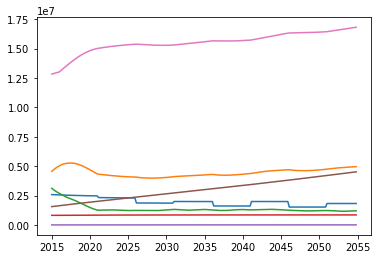

In [7]:
x = 4
results[x]['Available Gas'].plot() #blue
results[x]['Energy stocks Oil'].plot() #yellow
results[x]['Energy stocks Coal'].plot() #green
results[x]['Extraction capacity installed Nuclear'].plot() #red
results[x]['Energy stocks Biofuels'].plot() #purple
results[x]['Extraction capacity installed other Renewables'].plot() #brown
results[x]['Energy Demand'].plot()

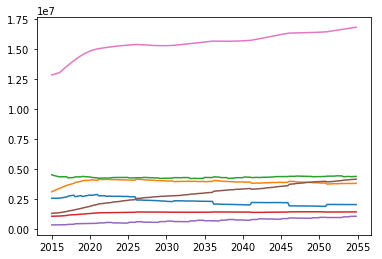

In [8]:
results[x]['Energy Demand Gas'].plot() #blue
results[x]['Energy Demand Oil'].plot() #yellow
results[x]['Energy Demand Coal'].plot() #green
results[x]['Energy Demand Nuclear'].plot() #red
results[x]['Energy Demand Biofuels'].plot() #purple
results[x]['Energy Demand other Renewables'].plot() #brown
results[x]['Energy Demand'].plot()